# Генерація звуків

In [26]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import soundfile
from IPython.display import display, Audio
from scipy.io import wavfile

### Загальні налаштування і функції

Тут встановлюються важливі константи для коду, наприклад, довжина згенерованих файлів та sample rate - кількість точок запису звукової хвилі на 1 секунду. 

In [27]:
SAMPLING_RATE = 48000  #частота дискретизації 
LENGTH = 4             #довжина генерованих файлів у секундах

clock_ticks = np.arange(0, LENGTH, 1/SAMPLING_RATE)       #розбиття проміжку на точки часу

def oscilator(frequency, amplitude, division=clock_ticks):
    '''
    Функція, що генерує звукову хвилю заданої в аргументі частоти
    та множника амплітуди (1 - максимальна, 0 - мінімальна)
    '''
    return (np.sin(np.pi*2*frequency*division)*32767*amplitude).astype(np.int16)


def plot_signal(signal, steps = SAMPLING_RATE/20):
    '''
    Функція, що виводить графік сигналу
    '''
    plt.plot(np.arange(0, len(signal), 1), signal)
    if steps:
        plt.xlim(0, steps)
    plt.hlines(0, 0, len(signal), color='red')


#### Генерація синусоїди

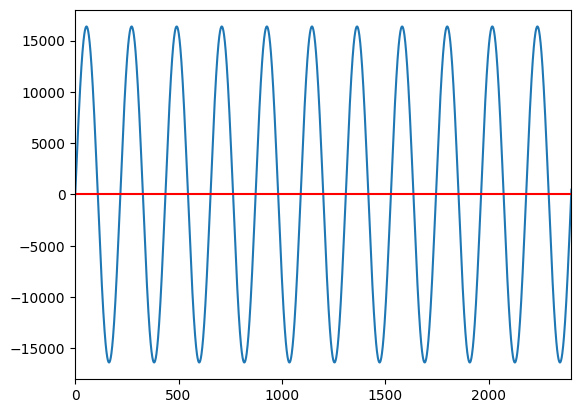

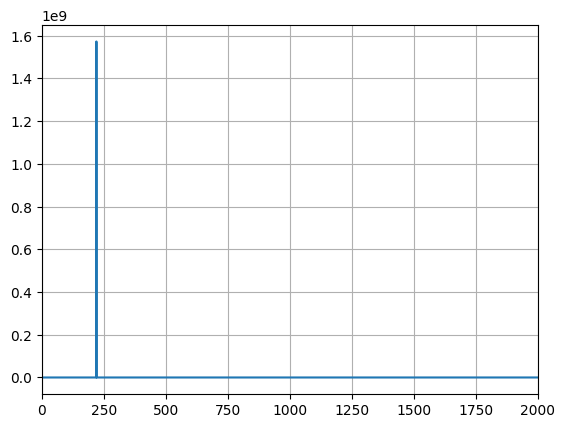

In [40]:
summa = oscilator(220, 0.5)

#запис у файл
wavfile.write("sin_wave.wav", SAMPLING_RATE, summa)
display(Audio('sin_wave.wav'))

# графіки сигналу та його частотного спектру
plot_signal(summa)
plt.show()

fft = np.fft.rfft(summa)
x_freq = np.fft.rfftfreq(len(clock_ticks), 1/SAMPLING_RATE)
plt.plot(x_freq, abs(fft))
plt.xlim(0, 2000)
plt.grid()
plt.show()

#### Генерація суми 2 синусоїд частотами 110 та 330 Герц

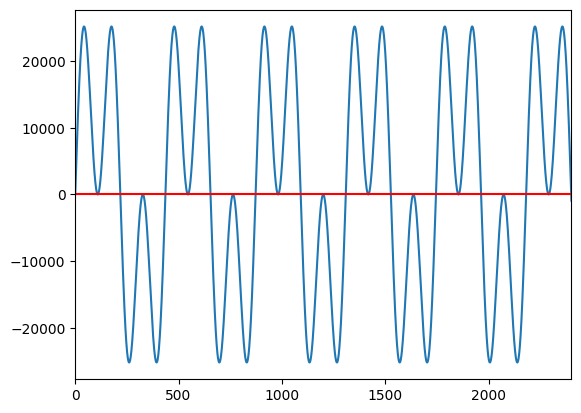

lenght of signal: 192000
lenght of rfft: 96001


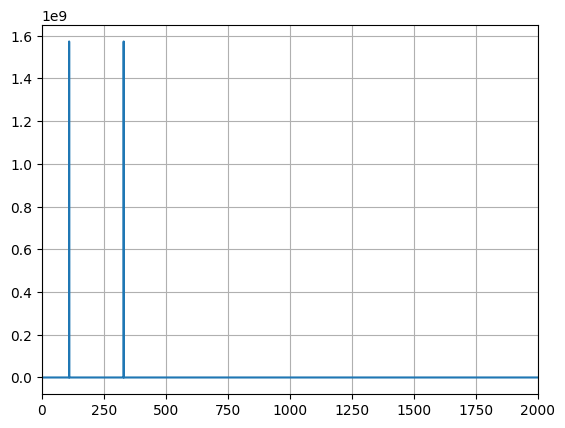

In [29]:
summa = oscilator(110, 0.5) + oscilator(330, 0.5) #+ oscilator(550, 0.3) + oscilator(770, 0.3)

#запис у файл
wavfile.write("110_and_330.wav", SAMPLING_RATE, summa)
display(Audio('110_and_330.wav'))


# графіки сигналу та його частотного спектру
plot_signal(summa)
plt.show()

fft = np.fft.rfft(summa)
x_freq = np.fft.rfftfreq(len(clock_ticks), 1/SAMPLING_RATE)
plt.plot(x_freq, abs(fft))
plt.xlim(0, 2000)
plt.grid()
plt.show()

#### Генерація квадратної хвилі

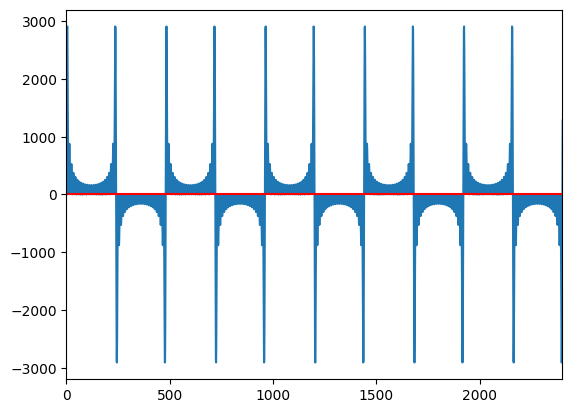

lenght of signal: 192000
lenght of rfft: 96001


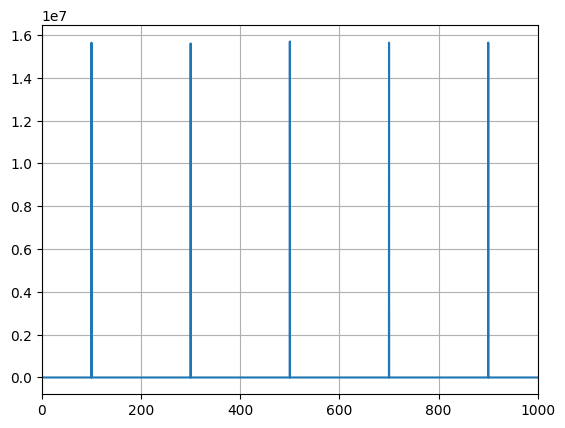

In [30]:
freq = 100

summa = np.sum(([oscilator(freq*i, 0.005) for i in range(1, 50, 2)]), axis=(0), dtype=np.int16)

# запис у файл
wavfile.write("square_wave.wav", SAMPLING_RATE, summa)
display(Audio('square_wave.wav'))

# графіки сигналу та його частотного спектру
plot_signal(summa)
plt.show()

fft = np.fft.rfft(summa)
x_freq = np.fft.rfftfreq(len(clock_ticks), 1/SAMPLING_RATE)
plt.plot(x_freq, abs(fft))
plt.xlim(0, 1000)
plt.grid()
plt.show()

#### Генерація пилоподібної хвилі

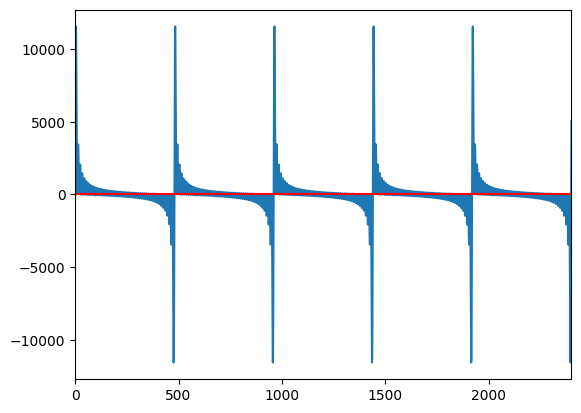

lenght of signal: 192000
lenght of rfft: 96001


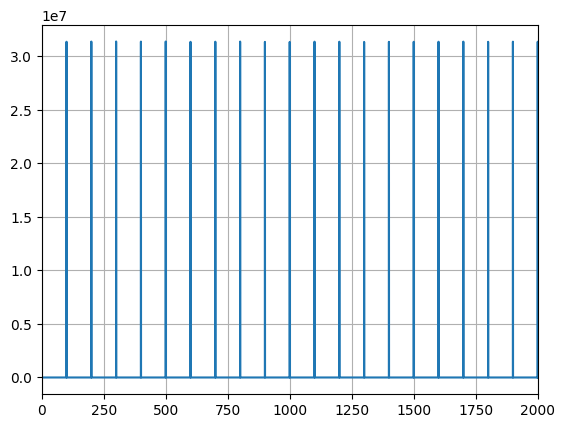

In [31]:
freq = 100
summa = np.sum(([oscilator(freq*i, 0.01) for i in range(1, 50)]), axis=(0), dtype=np.int16)

# запис у файл
wavfile.write("sawtooth_wave.wav", SAMPLING_RATE, summa)
display(Audio('sawtooth_wave.wav'))

# графіки сигналу та його частотного спектру
plot_signal(summa)
plt.show()

fft = np.fft.rfft(summa)
x_freq = np.fft.rfftfreq(len(clock_ticks), 1/SAMPLING_RATE)
plt.plot(x_freq, abs(fft))
plt.xlim(0, 2000)
plt.grid()
plt.show()

#### Базова частота ноти соль

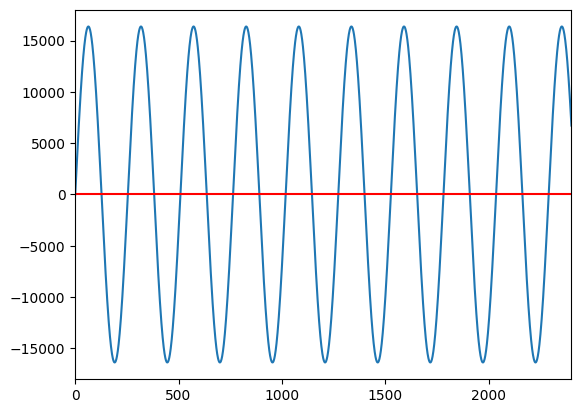

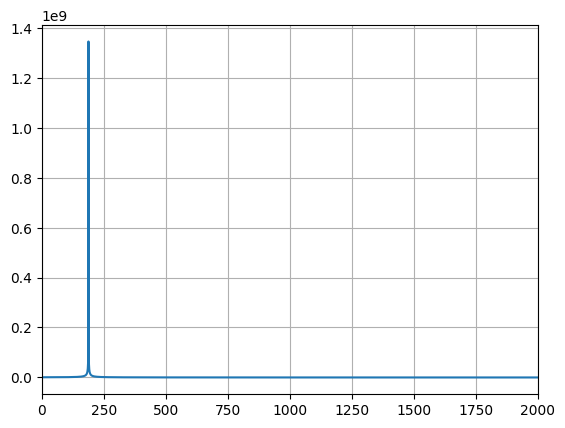

In [51]:
summa = oscilator(188.576, 0.5)

#запис у файл
wavfile.write("sin_wave_g.wav", SAMPLING_RATE, summa)
display(Audio('sin_wave_g.wav'))

#### Та сама нота на реальному інструменті

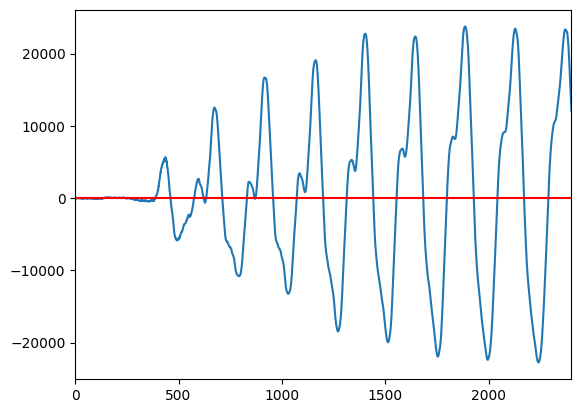

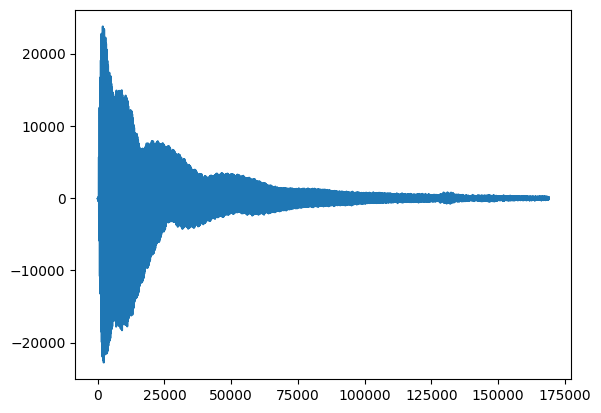

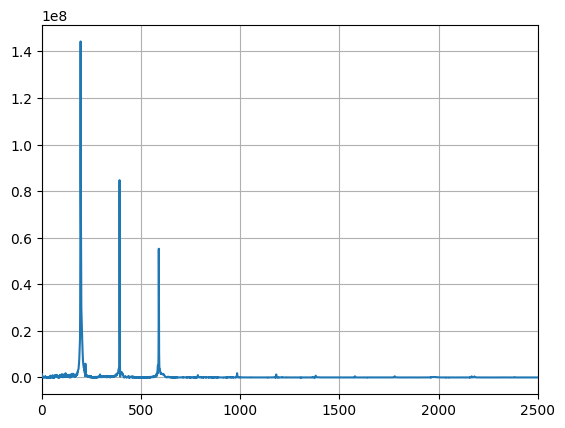

In [48]:
display(Audio('guitar_g_note.wav'))

guitar_sr, guitar_data = wavfile.read('guitar_g_note.wav')

plot_signal(guitar_data)
plt.show()

plt.plot(guitar_data)
# plt.xlim(0, 25000)
plt.show()

fft = np.fft.rfft(guitar_data)
x_freq = np.fft.rfftfreq(len(guitar_data), 1/guitar_sr)
plt.plot(x_freq, abs(fft), zorder=4)
plt.xlim(0, 2500)


plt.grid()
plt.show()

#### Генерація тризвуку як суми 3 синусоїд

За частоти для генераторів синусоїд було взято ідеальні значення частот трьох нот, які наявні у цьому звуці.

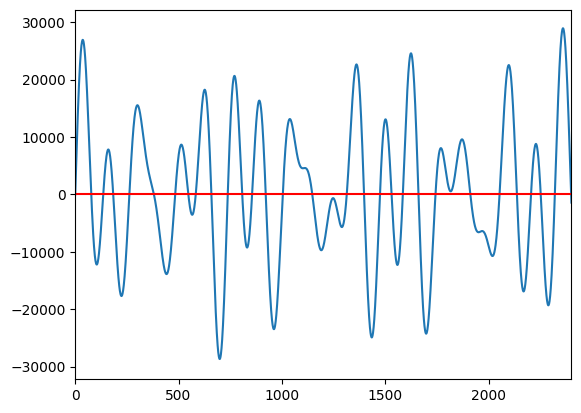

lenght of signal: 192000
lenght of rfft: 96001


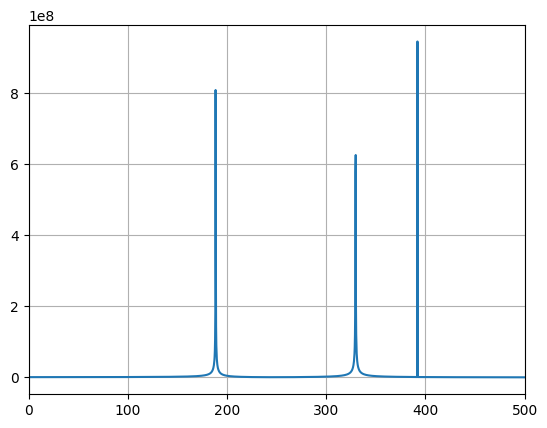

In [32]:
summa = oscilator(188.576, 0.3) + oscilator(329.63, 0.3) + oscilator(392.00, 0.3)

# запис у файл
wavfile.write("triad.wav", SAMPLING_RATE, summa)
display(Audio('triad.wav'))

# графіки сигналу та його частотного спектру
plot_signal(summa)
plt.show()

fft = np.fft.rfft(summa)
x_freq = np.fft.rfftfreq(len(clock_ticks), 1/SAMPLING_RATE)
plt.plot(x_freq, abs(fft))
plt.xlim(0, 500)
plt.grid()
plt.show()


#### Цей самий тризвук на справжній гітарі 


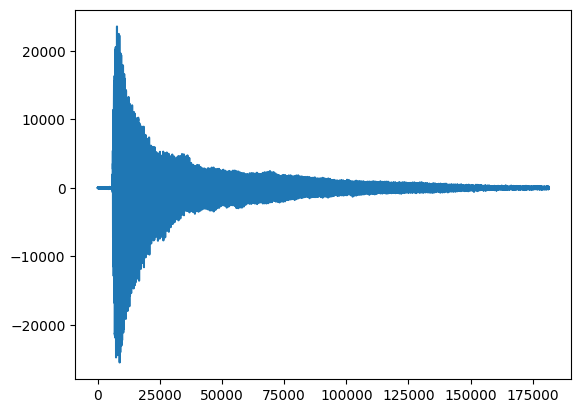

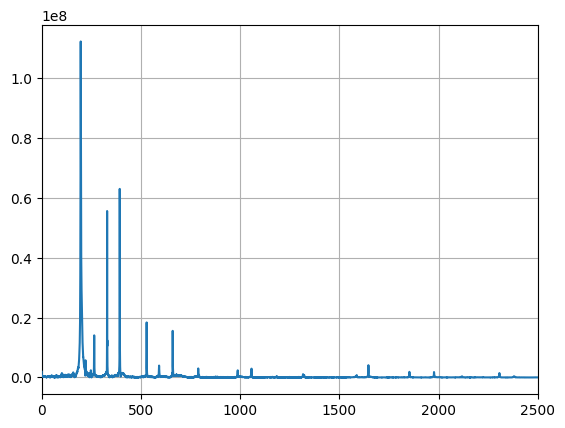

In [50]:
display(Audio('guitar_c_triad.wav'))

guitar_sr, guitar_data = wavfile.read('guitar_c_triad.wav')


plt.plot(guitar_data)
# plt.xlim(0, 25000)
plt.show()

fft = np.fft.rfft(guitar_data)
x_freq = np.fft.rfftfreq(len(guitar_data), 1/guitar_sr)
plt.plot(x_freq, abs(fft), zorder=4)
plt.xlim(0, 2500)


plt.grid()
plt.show()

#### Генерація звуку струни - алгоритм Карплуса-Стронга

Згенерований звук:


Звук реальної гітари для порівняння:


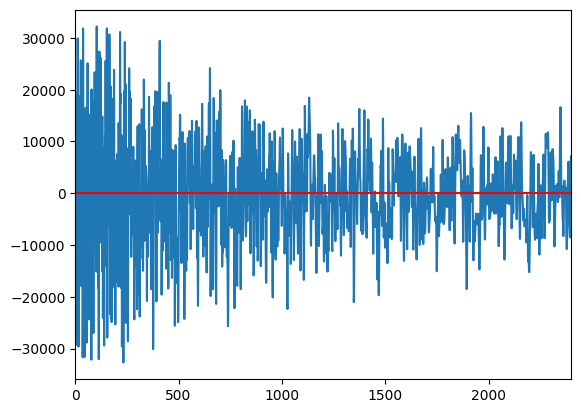

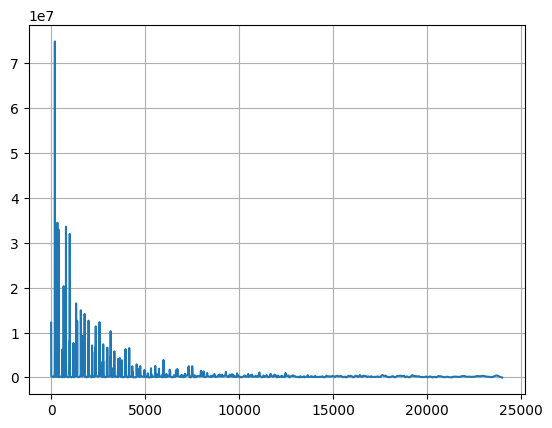

In [67]:
# Реалізація алгоритму Карплуса-Стронга

from collections import deque 

def generate_note(freq):
    nSamples = 48000*4
    sampleRate = 48000
    N = int(sampleRate/freq)
    
    buf = deque([np.random.random() - 0.5 for i in range(N)])
    
    samples = np.array([0]*nSamples, 'float32')
    for i in range(nSamples):
        samples[i] = buf[0]
        avg = 0.996*0.5*(buf[0] + buf[1])
        buf.append(avg)
        buf.popleft()  
         

    samples = np.array(samples * 32767, 'int16')
    return samples


# той самий тризвук, який звучав у попередніх комірках
summa = generate_note(197) + generate_note(329.63) + generate_note(392)

wavfile.write("experiment.wav", SAMPLING_RATE, summa)
print('Згенерований звук:')
display(Audio('experiment.wav'))
print('Звук реальної гітари для порівняння:')
display(Audio('guitar_c_triad.wav'))

plot_signal(summa)
plt.show()

fft = np.fft.rfft(summa)
x_freq = np.fft.rfftfreq(len(summa), 1/48000)
plt.plot(x_freq, abs(fft))
# plt.xlim(0, 2000)

plt.grid()
plt.show()
    